/home/andreasstillits/coding/Leaves1D/supplementary/notebooks
/home/andreasstillits/coding/Leaves1D


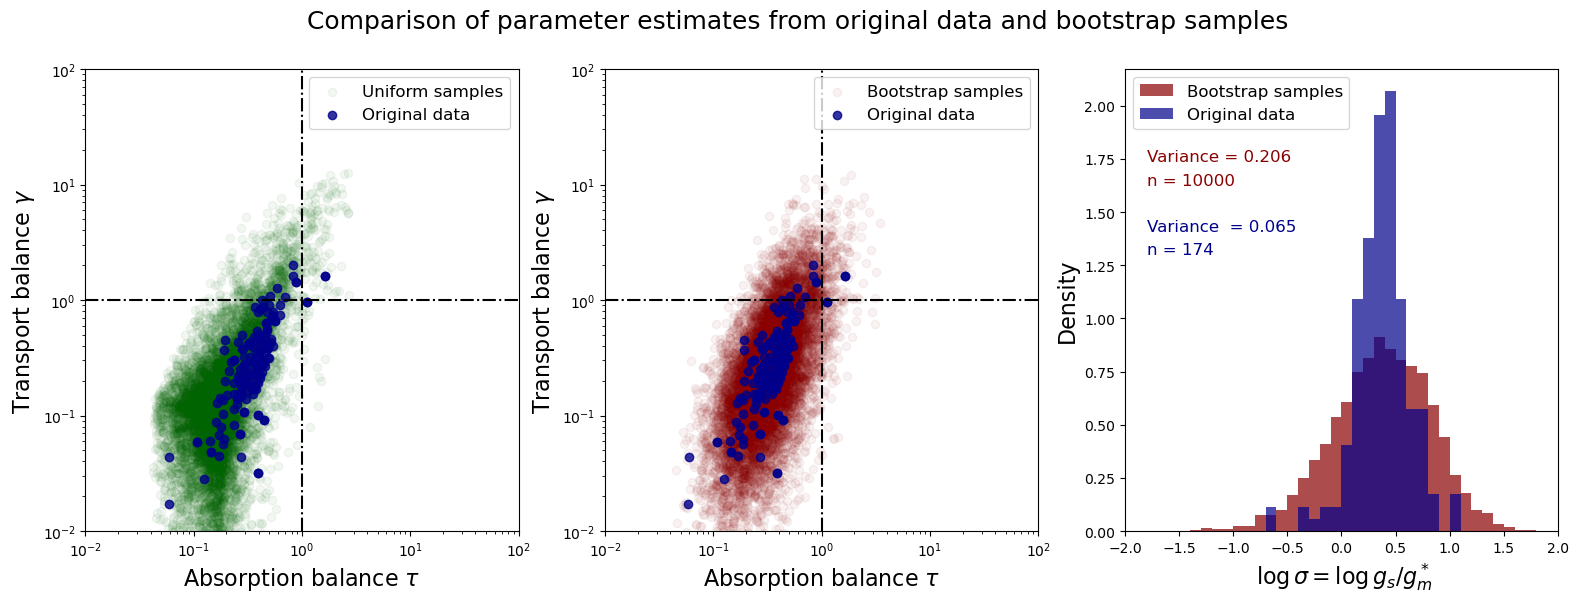

In [45]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd  

np.random.seed(142)  # for reproducibility

%cd "/home/andreasstillits/coding/Leaves1D/supplementary/notebooks"

df = pd.read_csv("../files/data/Knauer2022_pre_tau_gamma.csv", decimal=',', sep=';')

gs = df["stomatal_conductance"].to_numpy()
L = df["mesophyll_thickness"].to_numpy()
Dias = df["ias_conductance"].to_numpy() * L
gias = Dias / L
gm = df["mesophyll_conductance*"].to_numpy()

%cd "/home/andreasstillits/coding/Leaves1D/"
from python_module.interface import numpy_estimate_parameters

taus, gammas = numpy_estimate_parameters(gm, gs, gias)
log_sigmas = np.log10((gammas / (taus * np.tanh(taus))))

num_samples = 10_000 

# uniform sampling

def uniform_sample(data, size):
    return np.random.uniform(low=np.min(data), high=np.max(data), size=size)


gs_uniform = uniform_sample(gs, num_samples)
gias_uniform = uniform_sample(gias, num_samples)
gm_uniform = uniform_sample(gm, num_samples)


taus_uniform, gammas_uniform = numpy_estimate_parameters(gm_uniform, gs_uniform, gias_uniform)
log_sigmas_uniform = np.log10(gammas_uniform / (taus_uniform * np.tanh(taus_uniform)))

# bootstrap sampling

def bootstrap_sample(data, size):
    return np.random.choice(data, size=size, replace=True)
     

gs_boot = bootstrap_sample(gs, num_samples)
L_boot = bootstrap_sample(L, num_samples)
Dias_boot = bootstrap_sample(Dias, num_samples)
gias_boot = Dias_boot / L_boot
# gias_boot = bootstrap_sample(gias, num_samples)
gm_boot = bootstrap_sample(gm, num_samples)

taus_boot, gammas_boot = numpy_estimate_parameters(gm_boot, gs_boot, gias_boot)
log_sigmas_boot = np.log10(gammas_boot / (taus_boot * np.tanh(taus_boot)))



figure, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(19, 6))

ax1.scatter(taus_uniform, gammas_uniform, marker="o", color="darkgreen", alpha=0.05, label="Uniform samples")
ax1.scatter(taus, gammas, marker="o", color="darkblue", alpha=0.8, label="Original data")
ax1.set_xlabel(r"Absorption balance $\tau$", fontsize=16)
ax1.set_ylabel(r"Transport balance $\gamma$", fontsize=16) 
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlim(0.01, 100)
ax1.set_ylim(0.01, 100)
ax1.plot([1, 1], [0.01, 100], color="black", linestyle="-.")
ax1.plot([0.01, 100], [1, 1], color="black", linestyle="-.")
ax1.legend(fontsize=12)


ax2.scatter(taus_boot, gammas_boot, marker="o", color="darkred", alpha=0.05, label="Bootstrap samples")
ax2.scatter(taus, gammas, marker="o", color="darkblue", alpha=0.8, label="Original data")
ax2.set_xlabel(r"Absorption balance $\tau$", fontsize=16)
ax2.set_ylabel(r"Transport balance $\gamma$", fontsize=16) 
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_xlim(0.01, 100)
ax2.set_ylim(0.01, 100)
ax2.plot([1, 1], [0.01, 100], color="black", linestyle="-.")
ax2.plot([0.01, 100], [1, 1], color="black", linestyle="-.")
ax2.legend(fontsize=12)


xmin, xmax = -2, 2  
n_bins = 4*10  # number of bins

# log-spaced bin edges
bins = np.linspace(xmin, xmax, n_bins+1)

ax3.hist(log_sigmas_boot, bins=bins, alpha=0.7, label="Bootstrap samples",
         color="darkred", density=True)
ax3.hist(log_sigmas,         bins=bins, alpha=0.7, label="Original data",
         color="darkblue", density=True)


ax3.set_xlim(xmin, xmax)
ax3.set_xlabel(r" $\log \sigma = \log g_s/g_m^*$", fontsize=16)
ax3.set_ylabel("Density", fontsize=16)
# annotate variances of the two distributions
var_original = np.var(log_sigmas)
var_bootstrap = np.var(log_sigmas_boot)
ax3.text(-1.8, 0.80 * ax3.get_ylim()[1], f"Variance = {var_bootstrap:.3f}", color="darkred", fontsize=12)
ax3.text(-1.8, 0.75 * ax3.get_ylim()[1], f"n = {num_samples}", color="darkred", fontsize=12)
ax3.text(-1.8, 0.65 * ax3.get_ylim()[1], f"Variance  = {var_original:.3f}", color="darkblue", fontsize=12)
ax3.text(-1.8, 0.60 * ax3.get_ylim()[1], f"n = {len(log_sigmas)}", color="darkblue", fontsize=12)
ax3.legend(fontsize=12)

plt.suptitle("Comparison of parameter estimates from original data and bootstrap samples", fontsize=18)
plt.savefig("supplementary/figures/bias_bootstrap.jpg", dpi=900)
plt.show()


<>:19: SyntaxWarning: invalid escape sequence '\g'
<>:19: SyntaxWarning: invalid escape sequence '\g'
/tmp/ipykernel_24402/2484720116.py:19: SyntaxWarning: invalid escape sequence '\g'
  plt.suptitle("Comparison of $\tau$ and $\gamma$ distributions", fontsize=18)


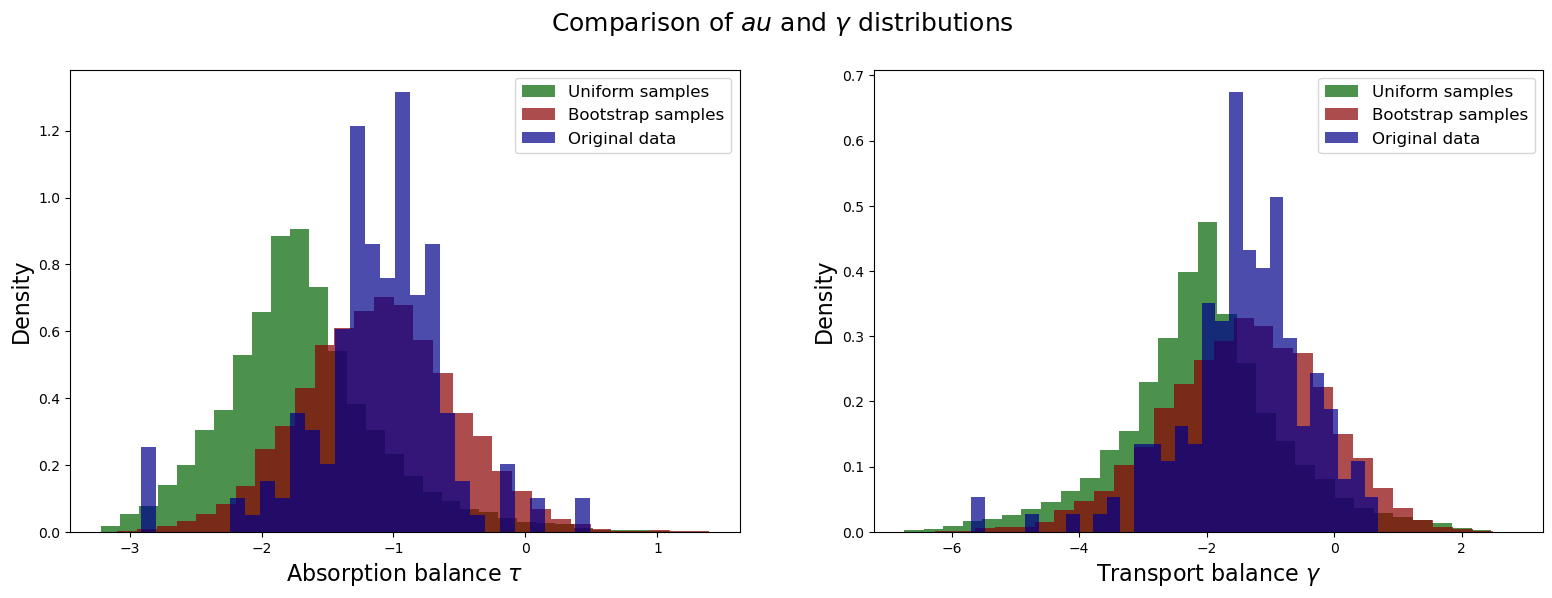

In [41]:
# plot histograms gamma and tau distributions for: original, uniform, and bootstrap samples

figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(19, 6))

ax1.hist(np.log(taus_uniform), bins=30, alpha=0.7, label="Uniform samples", color="darkgreen", density=True)
ax1.hist(np.log(taus_boot), bins=30, alpha=0.7, label="Bootstrap samples", color="darkred", density=True)
ax1.hist(np.log(taus), bins=30, alpha=0.7, label="Original data", color="darkblue", density=True)
ax1.set_xlabel(r"Absorption balance $\tau$", fontsize=16)
ax1.set_ylabel("Density", fontsize=16)
ax1.legend(fontsize=12)

ax2.hist(np.log(gammas_uniform), bins=30, alpha=0.7, label="Uniform samples", color="darkgreen", density=True)
ax2.hist(np.log(gammas_boot), bins=30, alpha=0.7, label="Bootstrap samples", color="darkred", density=True)
ax2.hist(np.log(gammas), bins=30, alpha=0.7, label="Original data", color="darkblue", density=True)
ax2.set_xlabel(r"Transport balance $\gamma$", fontsize=16)
ax2.set_ylabel("Density", fontsize=16)
ax2.legend(fontsize=12)

plt.suptitle("Comparison of $\tau$ and $\gamma$ distributions", fontsize=18)
plt.show()